In [39]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import boto3
from tqdm.notebook import tqdm
plt.style.use('rossidata')
from sklearn.model_selection import KFold,train_test_split,LeaveOneOut,ShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import sem
import easing
from collections import Counter
from tqdm.notebook import tqdm
from scipy.stats import spearmanr

sys.path.append('../Utility_Scripts/')
from synthetic_data_generator import MLR,meal_income
from ensemble_methods import EnsembleModel
from sklearn.metrics import mean_squared_error
from easing import easing


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
meal_income_dict=meal_income(size=1000)
x_values=meal_income_dict['X']
y_values=meal_income_dict['y']
X_dataset, X_holdout, y_dataset, y_holdout = train_test_split(x_values, y_values, test_size=0.1,random_state=42)

In [93]:
ensmeble=EnsembleModel(X_dataset,y_dataset)
ensmeble.train_models(n_splits=1000,kernal='LGB')
output=ensmeble.predict(X_holdout)


[autoreload of ensemble_methods failed: Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_co

Text(0, 0.5, 'Predicted Values')

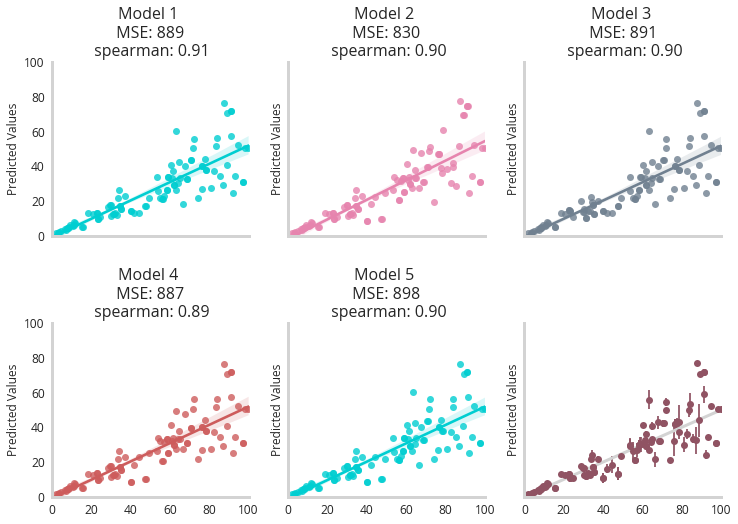

In [94]:
raw_pred=ensmeble.raw_predictions['X']

dims=np.shape(raw_pred)

fig,ax=plt.subplots(2,3,figsize=(12,8),sharex=True,sharey=True,gridspec_kw={ 'hspace': 0.5})
ax=ax.ravel()

ax[0].set_xlim([0,100])
ax[0].set_ylim([0,100])

titles=['Model 1','Model 2','Model 3','Model 4','Model 5','Ensemble Model']
colors=['darkturquoise']*5+['#905363']
test_vals=y_holdout

for j in range(5):
    
    
    
    sns.regplot(X_holdout.ravel(),raw_pred[j,:],ax=ax[j])

    ax[j].set_ylabel('Predicted Values')
    ax[j].set_title(f'{titles[j]} \n MSE: {mean_squared_error(X_holdout.ravel(),raw_pred[j,:]):.0f} \n spearman: {spearmanr(X_holdout.ravel(),raw_pred[j,:])[0]:.2f}')


ensemble_predictions=output['prediction']
ensemble_uncertainty=output['uncertainty']

ax[5].errorbar(X_holdout.ravel(),ensemble_predictions, yerr=ensemble_uncertainty,color='#905363',fmt='o')
ax[5].plot([0,100],[0,50],color='#d3d3d3',linewidth=3)
ax[5].set_ylabel('Predicted Values')


In [95]:
### create a dataframe for animation
animation_dict_y_y={}
animation_dict_x_y={}

n=0
for r in range(dims[0]):

    x=raw_pred[r,:]

    y=X_holdout.ravel()
    result = [None]*(len(x)+len(y))
    result[::2] = y
    result[1::2] = x
    animation_dict_x_y[f'Model {r+1}']=result

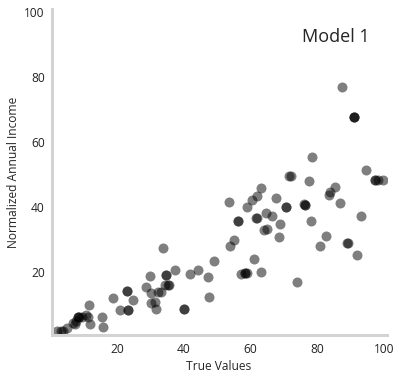

In [77]:
easing.Eased(pd.DataFrame(animation_dict_x_y).T).scatter_animation2d(speed=0.5,
                                                          label=True,
                                                          destination='../Media/k_fold_xy.gif',
                                                          plot_kws={'alpha':0.5,'title':'5 Seperate Models',
                                                                                         'xlabel':'True Values',
                                                                                        'ylabel':'Normalized Annual Income'})

In [80]:
output

{'prediction': array([20.69005667, 37.4700653 , 32.58801918, 29.130395  , 19.18662898,
        44.23905778, 33.10112435, 26.10982665, 48.85141476,  7.40550092,
        33.29775409,  6.39062979, 40.97731594, 45.35059597, 38.06042249,
        63.2454009 , 11.13968691, 63.21530837, 30.09116201, 19.33918139,
        29.87407229, 15.94525677, 11.84451908, 25.44582138, 13.14382512,
        10.00309224,  7.20977004, 45.35059597, 62.64953735, 40.39343621,
        22.43525261,  4.23204848, 39.03146663, 20.27288487, 11.84451908,
        10.95829006, 43.60109106, 38.00526089, 63.2454009 ,  3.91494037,
        11.98968894,  5.43846907, 24.05364467, 45.35059597, 12.95380619,
        15.61127307, 27.03782658, 35.11838968, 13.55029208, 25.28892012,
        43.4426376 , 57.67332292, 15.15947801, 34.09591684,  1.70619048,
         2.00606437, 33.31451273,  1.51805746, 11.89893192, 47.87881354,
        13.12340507,  3.78831254, 27.04930074, 13.14382512, 55.9068941 ,
        52.50127397, 30.34911596, 73.